<a href="https://colab.research.google.com/github/ipeirotis/dealing_with_data/blob/master/08-Visualization/Visualization_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from io import StringIO

EastIndiesTrade = '''
ID Year Exports Imports
1  1700     180     460
2  1701     170     480
3  1702     160     490
4  1703     150     500
5  1704     145     510
6  1705     140     525
7  1706     135     550
8  1707     125     565
9  1708     120     580
10 1709     110     590
11 1710     105     625
12 1711     105     650
13 1712     100     680
14 1713     100     710
15 1714     100     725
16 1715     100     755
17 1716     100     795
18 1717     100     825
19 1718     110     860
20 1719     120     880
21 1720     130     900
22 1721     140     925
23 1722     145     940
24 1723     150     955
25 1724     145     960
26 1725     135     965
27 1726     130     970
28 1727     130     975
29 1728     145     980
30 1729     160     980
31 1730     170     975
32 1731     170     980
33 1732     170     980
34 1733     175     982
35 1734     205     985
36 1735     225     987
37 1736     260     985
38 1737     285     982
39 1738     310     980
40 1739     345     980
41 1740     370     980
42 1741     390     978
43 1742     410     975
44 1743     440     975
45 1744     465     978
46 1745     500     980
47 1746     520     980
48 1747     550     960
49 1748     585     960
50 1749     650     955
51 1750     700     940
52 1751     725     910
53 1752     750     880
54 1753     780     850
55 1754     805     835
56 1755     810     830
57 1756     810     830
58 1757     815     850
59 1758     825     890
60 1759     850     945
61 1760     875    1000
62 1761     910    1100
63 1762     950    1300
64 1763    1010    1400
65 1764    1120    1470
66 1765    1330    1500
67 1766    1380    1510
68 1767    1395    1515
69 1768    1380    1520
70 1769    1350    1525
71 1770    1330    1530
72 1771    1285    1530
73 1772    1250    1535
74 1773    1190    1535
75 1774    1050    1535
76 1775     925    1535
77 1776     880    1540
78 1777     860    1545
79 1778     845    1545
80 1779     840    1550
81 1780     840    1550
'''


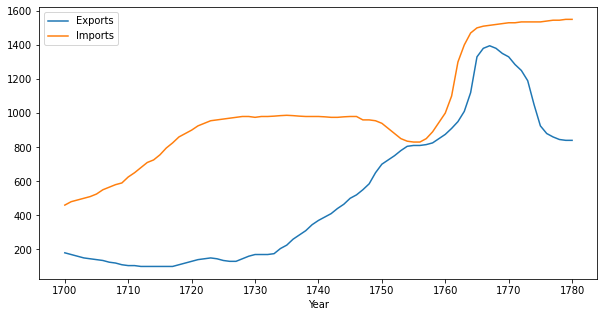

In [ ]:
import pandas as pd
df  = pd.read_fwf(StringIO(EastIndiesTrade), sep=' ', header=1)
df = df.drop('ID', axis='columns')
df = df.set_index("Year")
df.plot(figsize = (10,5))

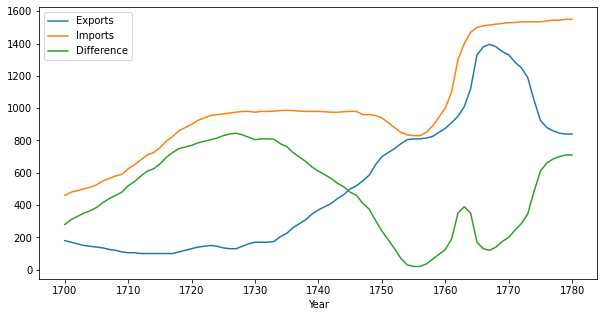

In [ ]:
df["Difference"] = df["Imports"]- df["Exports"] 
df.plot(figsize = (10,5))

# NCDC Normals

https://www1.ncdc.noaa.gov/pub/data/normals/1981-2010/readme.txt

In [ ]:
import pandas as pd 

In [ ]:
stations = pd.read_fwf('https://www1.ncdc.noaa.gov/pub/data/normals/1981-2010/station-inventories/allstations.txt', header=None)
stations.columns = ['station_id', 'lat', 'lon', 'elevation', 'state', 'name', 'is_GSN_station', 'is_HCN_station', 'WMO_number' ]
stations = stations.drop(['is_GSN_station', 'is_HCN_station', 'WMO_number'], axis='columns')
stations = stations[ stations["station_id"].str.startswith("US")]
stations

,station_id,lat,lon,elevation,state,name
116,USC00010008,31.5703,-85.2483,139.0,AL,ABBEVILLE
117,USC00010063,34.2553,-87.1814,249.3,AL,ADDISON
118,USC00010140,32.2322,-87.4103,53.3,AL,ALBERTA
119,USC00010160,32.9453,-85.9481,195.1,AL,ALEXANDER CITY
120,USC00010178,33.1272,-88.1550,59.4,AL,ALICEVILLE
...,...,...,...,...,...,...
9865,USW00094992,47.7472,-90.3444,185.9,MN,GRAND MARAIS
9866,USW00094993,45.6689,-96.9914,353.9,SD,SISSETON MUNI AP
9867,USW00094994,43.1561,-90.6775,204.8,WI,BOSCOBEL AP
9868,USW00094995,40.8483,-96.5650,362.4,NE,LINCOLN 8 ENE


In [ ]:
# !curl https://www1.ncdc.noaa.gov/pub/data/normals/1981-2010/products/temperature/dly-tavg-normal.txt -o dly-tavg-normal.txt

# read the fixed width file
data_url = "https://www1.ncdc.noaa.gov/pub/data/normals/1981-2010/products/temperature/dly-tavg-normal.txt"



# We set the infer_nrows to a large value, because otherwise
# some columns that have length greater than 4 get truncated
# (e.g., all the temperatures > 100 in Dealth Valley get truncated
# to values close to 0, because the leading 1 is missing)
df = pd.read_fwf(data_url, header=None, infer_nrows=100000, dtype="object")

# column names for the fixed-width file
# The format is station, momth, and then one column per day
columns = ["station_id", "month"]
days = [f"{i:02.0f}" for i in range(1, 32)]
df.columns = columns + days

# un-pivot the table
df = pd.melt(df, id_vars=columns, value_vars=days, var_name="day")

# extract the number and the flag from the temperature
regex = r"(-*\d+)(\w*)"
df = pd.concat([df, df["value"].str.extract(regex)], axis="columns")
df = df.drop("value", axis="columns")
df.columns = ["station_id", "month", "day", "temperature", "flag"]

# Remove dummy values from temperature and
# convert to F by dividing by 10
df["temperature"] = pd.to_numeric(df["temperature"])
df = df[df["temperature"] != -8888]
df["temperature"] = df["temperature"] / 10

# Keep only entries that are "Complete", "Standard"
df = df[df["flag"].isin(['C','S','R'])]

# Convert month-day pairs to actual dates
df["date"] = "2000-" + df["month"].astype(str) + "-" + df["day"].astype(str)
df["date"] = pd.to_datetime(df["date"])

# join with the details of each station
df = pd.merge(df, stations)

In [ ]:
stats = df.pivot_table(
    
    index="station_id", 
    values="temperature", 
    aggfunc=["std",'mean','max','min']
)

stats.columns = ['std_temp', 'avg_temp','max_temp', 'min_temp']
stats = stats.reset_index()

excluded_states = []
# excluded_states = ['HI','CA','FL','WA','OR','AK','TX']
s = stations[~stations["state"].isin(excluded_states)]
stats = pd.merge(stats, s).sort_values('max_temp')
stats

,station_id,std_temp,avg_temp,max_temp,min_temp,lat,lon,elevation,state,name
5980,USW00027502,21.105302,11.778415,41.1,-14.5,71.2833,-156.7814,9.4,AK,BARROW POST ROGERS AP
5188,USC00502126,24.443244,11.347463,45.6,-17.3,70.4322,-150.4094,1.5,AK,COLVILLE VILLAGE
5979,USW00027406,24.709580,10.966866,46.2,-18.0,70.1917,-148.4772,18.6,AK,DEADHORSE AP
5981,USW00027503,23.140785,16.112500,46.3,-15.2,70.6392,-159.9950,9.1,AK,WAINWRIGHT AP
5252,USC00507780,23.936466,12.000546,46.9,-18.3,70.2500,-148.3333,22.9,AK,PRUDHOE BAY
...,...,...,...,...,...,...,...,...,...,...
94,USC00021050,15.065697,74.660383,96.7,53.4,35.1411,-114.5686,161.8,AZ,BULLHEAD CITY
138,USC00024759,15.700194,74.958470,96.9,52.5,34.4500,-114.3667,146.9,AZ,LAKE HAVASU
5808,USW00023179,15.469574,74.173497,97.0,52.1,34.7675,-114.6189,271.3,CA,NEEDLES AP
139,USC00024761,15.701110,74.574590,97.6,51.8,34.5031,-114.3603,136.9,AZ,LAKE HAVASU CITY


Text(0, 0.5, 'temperature (°F)')

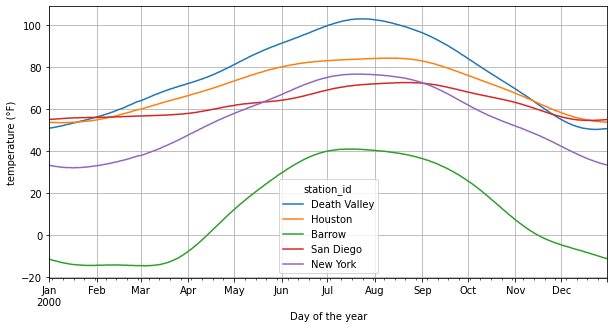

In [ ]:
# The list of stations that we want to plot
# and their friendly names (we will use the 
# friendly names to rename the time series later)
list_stations = {
    "USC00042319": "Death Valley",  # Death Valley, CA 92328 hottest point in the US
    "USW00094728": "New York",  # New York, NY 10012
    "USW00093107": "San Diego",  # San Diego, CA 92145
    "USW00012918": "Houston",  # Houston, TX 77061
    "USW00027502": "Barrow", # Barrow, AK 99723, coldest point in the US
    
    #"USC00516128": "Honolulu", # Honolulu, HI 96813
}

# Keep only the data for the selected stations
data = df[df.station_id.isin(list_stations.keys())]

# Create a pivot table with the stations as columns
pivot = data.pivot_table(
    index="date", 
    columns="station_id", 
    values="temperature", 
    # aggfunc="mean"
)

# Change the name of the columns to use the friendly names
pivot.rename(list_stations, axis="columns", inplace=True)

ax = pivot.plot(grid=True, figsize=(10,5))
ax.set_xlabel("Day of the year")
ax.set_ylabel("temperature (°F)")

In [ ]:
import seaborn as sns
months = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec",
]
locations = ["Barrow", "New York", "San Diego", "Houston", "Death Valley"]

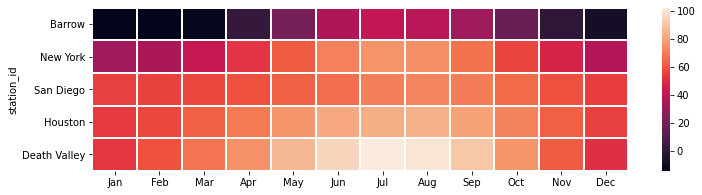

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,3))
heatmap = pivot.resample("1M").mean()
heatmap.index = months
heatmap = heatmap[locations]
g = sns.heatmap(heatmap.T, linewidths=1)
g.set_yticklabels(g.get_yticklabels(),rotation=0) 
pass

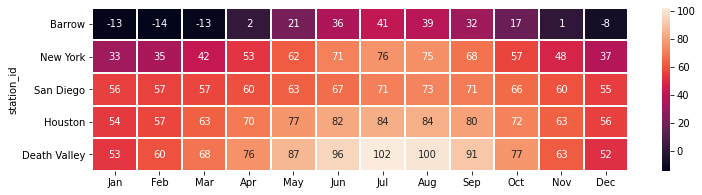

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,3))
heatmap = pivot.resample("1M").mean()
heatmap.index = months
heatmap = heatmap[locations]
g = sns.heatmap(heatmap.T, annot=True, fmt="2.0f", linewidths=1)
g.set_yticklabels(g.get_yticklabels(),rotation=0) 
pass

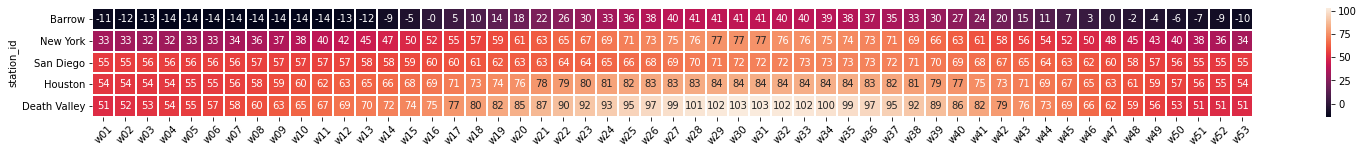

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(26,2))
heatmap = pivot.resample("1W").mean()
heatmap.index = [f'w{i:02.0f}' for i in range(1,54)]
heatmap = heatmap[locations]
g = sns.heatmap(heatmap.T, annot=True, fmt="2.0f", linewidths=1)
g.set_yticklabels(g.get_yticklabels(),rotation=0) 
g.set_xticklabels(g.get_xticklabels(),rotation=45) 
pass

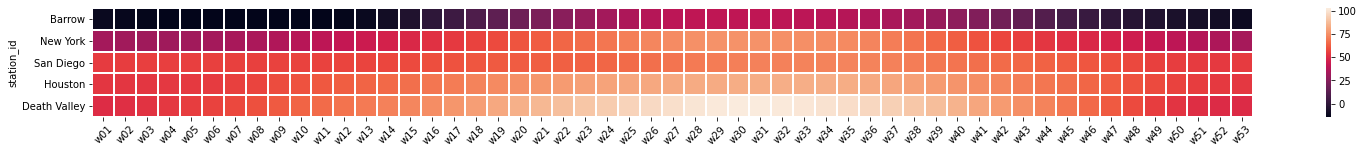

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(26,2))
heatmap = pivot.resample("1W").mean()
heatmap.index = [f'w{i:02.0f}' for i in range(1,54)]
heatmap = heatmap[locations]
g = sns.heatmap(heatmap.T, linewidths=1)
g.set_yticklabels(g.get_yticklabels(),rotation=0) 
g.set_xticklabels(g.get_xticklabels(),rotation=45) 
pass

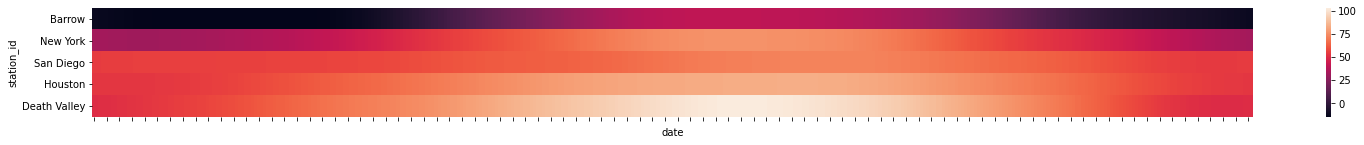

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(26,2))
heatmap = pivot
heatmap = heatmap[locations]
g = sns.heatmap(heatmap.T)
g.set_yticklabels(g.get_yticklabels(),rotation=0)
g.set(xticklabels=[])
pass

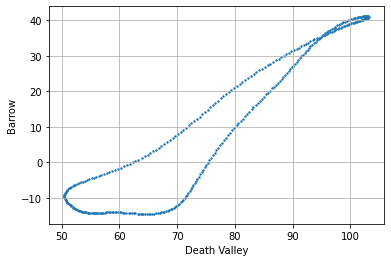

In [ ]:
pivot.plot.scatter(x="Death Valley", y="Barrow", s=2, grid=True)

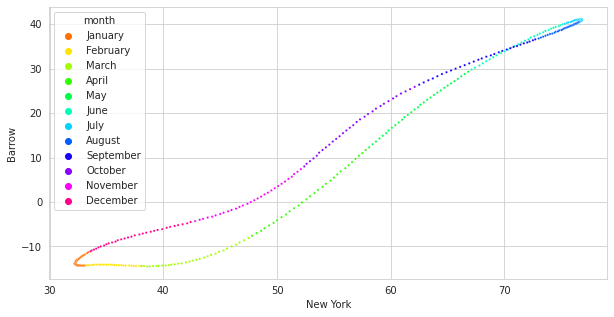

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_style("whitegrid")
d = pivot.reset_index()
d['month'] = d['date'].dt.month_name()
sns.scatterplot(data=d, x="New York", y="Barrow", s=5, hue='month', palette="hsv")

In [ ]:
pivot

station_id,Death Valley,Houston,Barrow,San Diego,New York
date,,,,,
2000-01-01,51.0,53.9,-11.3,55.2,33.4
2000-01-02,51.2,53.8,-11.5,55.3,33.3
2000-01-03,51.3,53.8,-11.8,55.3,33.1
2000-01-04,51.4,53.8,-12.0,55.4,33.0
2000-01-05,51.6,53.8,-12.1,55.4,32.9
...,...,...,...,...,...
2000-12-27,50.6,54.1,-10.2,55.0,34.3
2000-12-28,50.7,54.1,-10.5,55.0,34.1
2000-12-29,50.8,54.0,-10.7,55.1,33.9


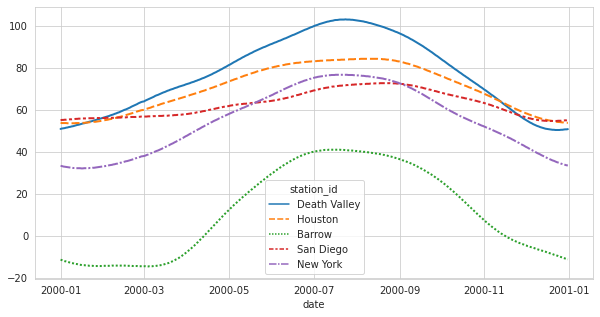

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=pivot, linewidth=2)

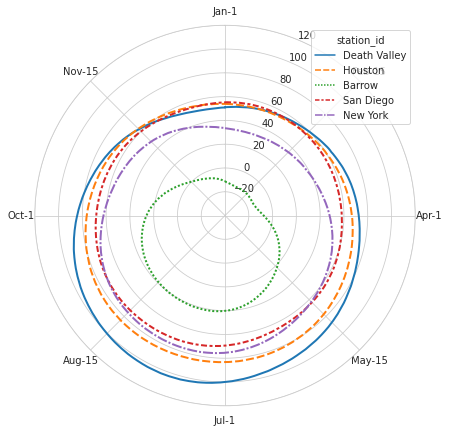

In [ ]:
import matplotlib.dates as mdates
import numpy as np

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10,7))
times = pd.date_range("01/01/2000", "12/31/2000")
t = mdates.date2num(pivot.index.to_pydatetime())
tnorm = (t-t.min())/(t.max()-t.min())*2.*np.pi
ax.set_ylim(-40,120)
ax.set_xticklabels(['Jan-1', 'Feb-15', 'Apr-1', 'May-15', 'Jul-1', 'Aug-15', 'Oct-1', 'Nov-15'])
ax.set_theta_direction(-1)
ax.set_theta_zero_location("N")
sns.lineplot(data=pivot.set_index(tnorm), linewidth=2)